# Titanic Survival Prediction

## Load the necesarry libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df=sns.load_dataset('titanic')

In [4]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


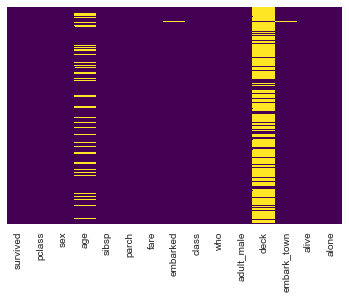

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

It is evident from the above heatmap that the age column contains approximately 19% null values which needs to be imputed and the embarked column has only two empty values.

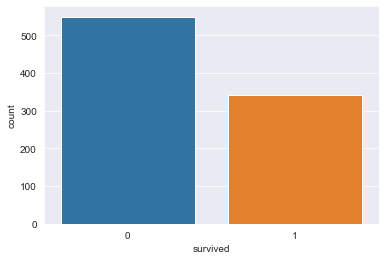

In [7]:
sns.countplot('survived', data=df)

Thus it is evident that approximately 62% could not survive the crash of the RMS Titanic whereas the rest 38% could manage to survive

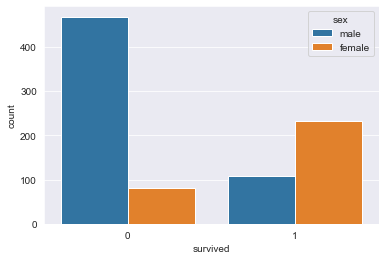

In [8]:
sns.countplot('survived', hue='sex', data=df)

The above graphs shows us that females had a greater chance of survival as compared to men.

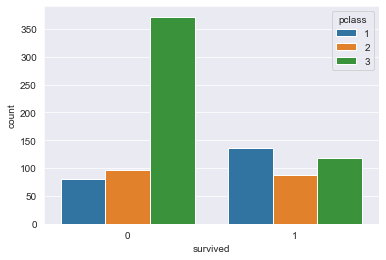

In [9]:
sns.countplot('survived', hue='pclass', data=df)

This shows that people belonging to the first class had a greater chance of survival as compared to the other classes. Which is again an evident fact. The more you pay the better are the chances of your survival!!

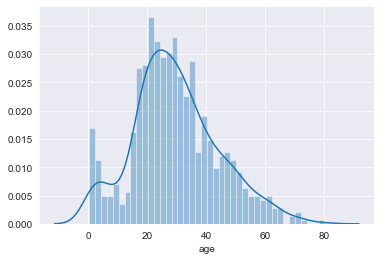

In [10]:
sns.distplot(df['age'].dropna(), bins=40)

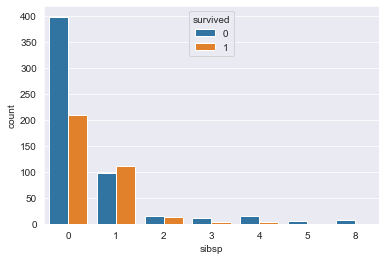

In [11]:
sns.countplot('sibsp', hue='survived', data=df)

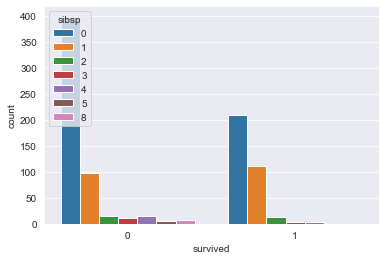

In [12]:
sns.countplot('survived', hue='sibsp', data=df)

From the above two graphs we can conclude that people who had a less number of sibling and spouce had a greater chance of survival so this an import factor of predicting whether a person survived or not

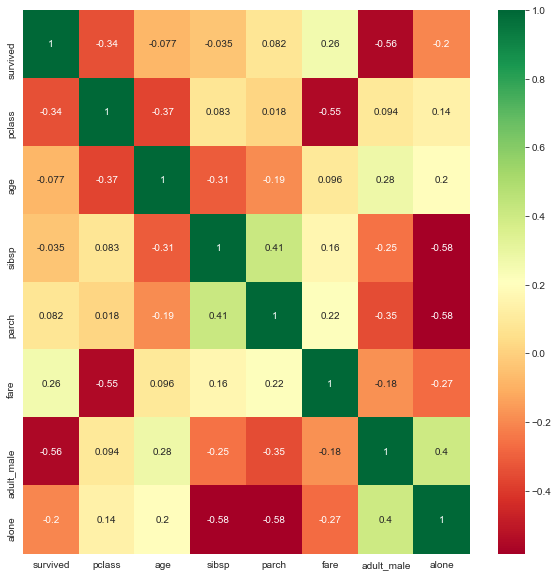

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

The above correlation matrix gives use the importance of all the features for predicting whether a person will survive or not

## Feature Engineering

We will drop all the redundant columns and the columns which are not necessary for predicting the survival chance of a person

In [14]:
df.drop(['class', 'deck', 'embark_town', 'alive'], axis=1, inplace=True)

In [15]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,True,True
887,1,1,female,19.0,0,0,30.0000,S,woman,False,True
888,0,3,female,NaN,1,2,23.4500,S,woman,False,False
889,1,1,male,26.0,0,0,30.0000,C,man,True,True


### Embarked

In [16]:
max_embarked=df['embarked'].value_counts().nlargest(1).index[0]
df.loc[df['embarked'].isnull(), 'embarked'] = max_embarked

### Age

In [17]:
mean = df["age"].mean()
std  = df["age"].std()
is_null = df["age"].isnull().sum()

# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

# fill NaN values in Age column with random values generated
df.loc[df['age'].isnull(), 'age']=rand_age

df['age']=df['age'].astype('int')

### Sibsp and Parch

sibsp and parch are two columns which indicates the number of (sibllings or spouce) and the number of (parent or children) on board the ship. We can merge these two columns into one named family and drop these two columns.

In [18]:
df['family']=df['sibsp']+df['parch']

In [19]:
df=df.drop(['sibsp', 'parch'], axis=1)

In [20]:
df

,survived,pclass,sex,age,fare,embarked,who,adult_male,alone,family
0,0,3,male,22,7.2500,S,man,True,False,1
1,1,1,female,38,71.2833,C,woman,False,False,1
2,1,3,female,26,7.9250,S,woman,False,True,0
3,1,1,female,35,53.1000,S,woman,False,False,1
4,0,3,male,35,8.0500,S,man,True,True,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,13.0000,S,man,True,True,0
887,1,1,female,19,30.0000,S,woman,False,True,0
888,0,3,female,24,23.4500,S,woman,False,False,3
889,1,1,male,26,30.0000,C,man,True,True,0


### Categorical Variables

Now we will convert all the categorical variables (sex, embarked, who, adult_male, alone) into dummy variable using the pandas get_dummy() method

In [21]:
df=pd.get_dummies(df, columns=['sex', 'embarked', 'who', 'adult_male', 'alone'], drop_first=True)

In [22]:
df

,survived,pclass,age,fare,family,sex_male,embarked_Q,embarked_S,who_man,who_woman,adult_male_True,alone_True
0,0,3,22,7.2500,1,1,0,1,1,0,1,0
1,1,1,38,71.2833,1,0,0,0,0,1,0,0
2,1,3,26,7.9250,0,0,0,1,0,1,0,1
3,1,1,35,53.1000,1,0,0,1,0,1,0,0
4,0,3,35,8.0500,0,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,13.0000,0,1,0,1,1,0,1,1
887,1,1,19,30.0000,0,0,0,1,0,1,0,1
888,0,3,24,23.4500,3,0,0,1,0,1,0,0
889,1,1,26,30.0000,0,1,0,0,1,0,1,1


## Model Creation

### We will first do the necessary imports for model creation

In [23]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report

### Train test split

In [24]:
X=df.drop('survived', axis=1)
y=df['survived']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [25]:
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)

Now we will test our dataset with different algorithms

### Logistic Regression

In [26]:
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [28]:
log_reg.score(X_test_scaled, y_test)

0.8268156424581006

In [29]:
confusion_matrix(y_test, y_pred_log_reg)

array([[106,  16],
       [ 15,  42]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       122
           1       0.72      0.74      0.73        57

    accuracy                           0.83       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.83      0.83      0.83       179



### k-Nearest Neighbors

In [31]:
scores=[]

In [32]:
for k in range(1, 21):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

In [33]:
max(scores)

0.8547486033519553